In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '758582b5-a6b5-42a0-9e67-ac2eb807bda1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11968,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983224e+07,1.983224e+07,False,NaN,1,NaN,NaN,None,2025-03-04T20:32:00.000Z,88109.179841,6.737251e+10,-5.6768,0.498370,2.299450,-0.769021,-10.159077,-10.568179,-10.427902,1.747402e+12,60.2153,1.850293e+12,None,2025-03-04T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:35:18.536296
1,1027,Ethereum,ETH,ethereum,9960,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205901e+08,1.205901e+08,True,NaN,2,NaN,NaN,None,2025-03-04T20:31:00.000Z,2180.575432,3.417757e+10,5.5680,1.272700,2.741563,-12.867661,-26.458360,-39.579009,-43.685463,2.629558e+11,9.0593,2.629558e+11,None,2025-03-04T20:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:35:18.536296
2,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,3,NaN,NaN,None,2025-03-04T20:32:00.000Z,2.493101,1.207890e+10,-18.3559,0.065479,3.772378,8.638012,-7.401174,1.292752,2.455204,1.444745e+11,4.9841,2.493101e+11,None,2025-03-04T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:35:18.536296
3,825,Tether USDt,USDT,tether,118287,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.425087e+11,1.445616e+11,True,NaN,4,NaN,NaN,None,2025-03-04T20:31:00.000Z,1.000093,1.319061e+11,-5.0660,0.006614,0.091238,0.093017,0.087132,0.030565,-0.158526,1.425219e+11,4.9113,1.445750e+11,None,2025-03-04T20:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-04 15:35:18.536296
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424758e+08,1.424758e+08,False,NaN,5,NaN,NaN,None,2025-03-04T20:32:00.000Z,583.724687,2.024242e+09,-8.0953,0.486271,1.568044,-6.232654,-6.909505,-18.057004,-21.238599,8.316662e+10,2.8629,8.316662e+10,None,2025-03-04T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:35:18.536296
5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.078970e+08,5.954370e+08,True,NaN,6,NaN,NaN,None,2025-03-04T20:32:00.000Z,143.469846,8.129082e+09,-16.6823,1.015355,-0.429623,-0.981205,-29.831509,-33.730879,-38.789745,7.286790e+10,2.5138,8.542725e+10,None,2025-03-04T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:35:18.536296
6,3408,USDC,USDC,usd-coin,26048,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.636349e+10,5.636349e+10,False,NaN,7,NaN,NaN,None,2025-03-04T20:32:00.000Z,1.000160,1.372892e+10,0.2434,-0.001970,0.034241,0.020934,0.016802,0.001588,0.001223,5.637249e+10,1.9447,5.637249e+10,None,2025-03-04T20:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-04 15:35:18.536296
7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521242e+10,4.499494e+10,False,NaN,8,NaN,NaN,None,2025-03-04T20:32:00.000Z,0.926430,5.350038e+09,-31.5569,-0.111205,6.450884,35.895607,13.047282,-16.366243,-22.968952,3.262184e+10,1.1254,4.168934e+10,None,2025-03-04T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:35:18.536296
8,74,Dogecoin,DOGE,dogecoin,1173,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",

In [7]:
def api_runner():

    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '758582b5-a6b5-42a0-9e67-ac2eb807bda1',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"E:\Coding\Data Analysis\Pandas Tutorial\API.csv"):
        df.to_csv(r"E:\Coding\Data Analysis\Pandas Tutorial\API.csv", header = 'column_names')
    else:
        df.to_csv(r"E:\Coding\Data Analysis\Pandas Tutorial\API.csv", mode='a', header = False)

In [9]:
import os
from time import time
from time import sleep

for i in range(50):
    api_runner()
    print('API Runner completed successfully.')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully.
API Runner completed successfully.
API Runner completed successfully.
API Runner completed successfully.
API Runner completed successfully.
API Runner completed successfully.
API Runner completed successfully.
API Runner completed successfully.


KeyboardInterrupt: 

In [13]:
df72 = pd.read_csv(r"E:\Coding\Data Analysis\Pandas Tutorial\API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11957,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.982722e+07,1.982722e+07,False,NaN,1,NaN,NaN,NaN,2025-02-21T13:00:00.000Z,98927.898711,3.290215e+10,17.2329,0.274895,1.529944,2.329523,-6.029256,2.841447,0.205942,1.961465e+12,60.0786,2.077486e+12,NaN,2025-02-21T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 08:02:04.186372
1,1,1027,Ethereum,ETH,ethereum,9945,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205640e+08,1.205640e+08,True,NaN,2,NaN,NaN,NaN,2025-02-21T13:00:00.000Z,2806.612842,1.700224e+10,17.8171,0.619340,2.348494,4.435603,-15.405372,-16.175672,-17.561279,3.383765e+11,10.3634,3.383765e+11,NaN,2025-02-21T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 08:02:04.186372
2,2,52,XRP,XRP,xrp,1541,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.788781e+10,9.998642e+10,False,NaN,3,NaN,NaN,NaN,2025-02-21T13:00:00.000Z,2.664548,3.757947e+09,-27.0734,0.325811,-0.883963,-1.252537,-17.472406,20.313692,73.374383,1.542449e+11,4.7237,2.664548e+11,NaN,2025-02-21T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 08:02:04.186372
3,3,825,Tether USDt,USDT,tether,117598,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.422144e+11,1.445668e+11,True,NaN,4,NaN,NaN,NaN,2025-02-21T13:00:00.000Z,1.000213,7.680612e+10,16.7845,0.009123,0.013912,0.010728,0.030464,0.140880,-0.090766,1.422446e+11,4.3569,1.445976e+11,NaN,2025-02-21T13:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-21 08:02:04.186372
4,4,1839,BNB,BNB,bnb,2372,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424768e+08,1.424768e+08,False,NaN,5,NaN,NaN,NaN,2025-02-21T13:01:00.000Z,664.483060,1.676390e+09,-4.6961,0.363288,2.687000,-0.330725,-5.000816,-2.074572,-0.586388,9.467340e+10,2.8998,9.467340e+10,NaN,2025-02-21T13:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 08:02:04.186372
5,5,5426,Solana,SOL,solana,841,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.886121e+08,5.945306e+08,True,NaN,6,NaN,NaN,NaN,2025-02-21T13:00:00.000Z,178.101880,3.685294e+09,9.0348,0.484890,2.704965,-9.629726,-31.253127,-3.295217,-30.928733,8.702273e+10,2.6652,1.058870e+11,NaN,2025-02-21T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 08:02:04.186372
6,6,3408,USDC,USDC,usd-coin,25872,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.632716e+10,5.632716e+10,False,NaN,7,NaN,NaN,NaN,2025-02-21T13:00:00.000Z,0.999955,7.425622e+09,12.7173,0.010884,0.002811,-0.006603,-0.002328,0.002011,0.018367,5.632466e+10,1.7249,5.632466e+10,NaN,2025-02-21T13:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-21 08:02:04.186372
7,7,74,Dogecoin,DOGE,dogecoin,1168,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.481380e+11,1.481380e+11,True,NaN,8,NaN,NaN,NaN,2025-02-21T13:00:00.000Z,0.257424,1.179538e+09,14.0400,0.819445,1.163613,-3.964281,-29.684998,-18.661488,-45.027231,3.813429e+10,1.1680,3.813429e+10,NaN,2025-02-21T13:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 08:02:04.186372
8,8,2010,Cardano,ADA,cardano,1465,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.5

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11968,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19832240.000000,19832240.000000,False,NaN,1,NaN,NaN,None,2025-03-04T20:50:00.000Z,87988.433574,67252693757.845955,-5.840700,0.147280,2.739787,-0.158599,-9.968785,-10.558606,-11.308531,1745007731856.967529,60.547700,1847757105046.949951,None,2025-03-04T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
1,1027,Ethereum,ETH,ethereum,9960,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120590104.196760,120590104.196760,True,NaN,2,NaN,NaN,None,2025-03-04T20:49:00.000Z,2159.242315,34803500802.974068,8.366700,-0.354910,1.793967,-13.474029,-26.705092,-40.157543,-44.164589,260383255800.592865,9.035900,260383255800.589996,None,2025-03-04T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
2,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.000000,57949738512.000000,99986390660.000000,False,NaN,3,NaN,NaN,None,2025-03-04T20:50:00.000Z,2.473759,11958100722.465128,-19.543200,-0.891118,3.544578,8.086307,-6.568199,0.778508,3.357260,143353715678.776550,4.974700,247375949158.239990,None,2025-03-04T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
3,825,Tether USDt,USDT,tether,118287,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142508685216.860382,144561615226.722015,True,NaN,4,NaN,NaN,None,2025-03-04T20:49:00.000Z,0.999928,131715523181.146988,-5.666100,0.016221,0.083249,0.048028,0.022168,0.017582,-0.218861,142498426417.705902,4.945000,144551208642.910004,None,2025-03-04T20:49:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-04 15:51:19.812521
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142475754.950000,142475754.950000,False,NaN,5,NaN,NaN,None,2025-03-04T20:50:00.000Z,583.110542,2010996466.215314,-8.697800,0.166525,1.886627,-6.270239,-6.372395,-18.104428,-20.552583,83079114716.913269,2.884700,83079114716.910004,None,2025-03-04T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,507896717.859439,595436972.858176,True,NaN,6,NaN,NaN,None,2025-03-04T20:49:00.000Z,143.019556,8087041680.391170,-17.276300,0.203158,-0.364432,-1.245223,-29.385896,-33.845063,-38.503062,72639163322.909348,2.520700,85159131766.460007,None,2025-03-04T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
6,3408,USDC,USDC,usd-coin,26048,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56420240774.458328,56420240774.458328,False,NaN,7,NaN,NaN,None,2025-03-04T20:49:00.000Z,0.999951,14509556132.772215,6.038800,0.002915,0.008530,0.010662,0.004912,-0.003918,-0.022426,56417474481.626801,1.957800,56417474481.629997,None,2025-03-04T20:49:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-04 15:51:19.812521
7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35212423444.401985,44994943014.639954,False,NaN,8,NaN,NaN,None,2025-03-04T20:50:00.000Z,0.919881,5304994351.113738,-32.295400,-0.

In [17]:
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11968,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19832240.000000,19832240.000000,False,NaN,1,NaN,NaN,None,2025-03-04T20:50:00.000Z,87988.433574,67252693757.845955,-5.840700,0.147280,2.739787,-0.158599,-9.968785,-10.558606,-11.308531,1745007731856.967529,60.547700,1847757105046.949951,None,2025-03-04T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
1,1027,Ethereum,ETH,ethereum,9960,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120590104.196760,120590104.196760,True,NaN,2,NaN,NaN,None,2025-03-04T20:49:00.000Z,2159.242315,34803500802.974068,8.366700,-0.354910,1.793967,-13.474029,-26.705092,-40.157543,-44.164589,260383255800.592865,9.035900,260383255800.589996,None,2025-03-04T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
2,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.000000,57949738512.000000,99986390660.000000,False,NaN,3,NaN,NaN,None,2025-03-04T20:50:00.000Z,2.473759,11958100722.465128,-19.543200,-0.891118,3.544578,8.086307,-6.568199,0.778508,3.357260,143353715678.776550,4.974700,247375949158.239990,None,2025-03-04T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
3,825,Tether USDt,USDT,tether,118287,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142508685216.860382,144561615226.722015,True,NaN,4,NaN,NaN,None,2025-03-04T20:49:00.000Z,0.999928,131715523181.146988,-5.666100,0.016221,0.083249,0.048028,0.022168,0.017582,-0.218861,142498426417.705902,4.945000,144551208642.910004,None,2025-03-04T20:49:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-04 15:51:19.812521
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142475754.950000,142475754.950000,False,NaN,5,NaN,NaN,None,2025-03-04T20:50:00.000Z,583.110542,2010996466.215314,-8.697800,0.166525,1.886627,-6.270239,-6.372395,-18.104428,-20.552583,83079114716.913269,2.884700,83079114716.910004,None,2025-03-04T20:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,507896717.859439,595436972.858176,True,NaN,6,NaN,NaN,None,2025-03-04T20:49:00.000Z,143.019556,8087041680.391170,-17.276300,0.203158,-0.364432,-1.245223,-29.385896,-33.845063,-38.503062,72639163322.909348,2.520700,85159131766.460007,None,2025-03-04T20:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-04 15:51:19.812521
6,3408,USDC,USDC,usd-coin,26048,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56420240774.458328,56420240774.458328,False,NaN,7,NaN,NaN,None,2025-03-04T20:49:00.000Z,0.999951,14509556132.772215,6.038800,0.002915,0.008530,0.010662,0.004912,-0.003918,-0.022426,56417474481.626801,1.957800,56417474481.629997,None,2025-03-04T20:49:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-04 15:51:19.812521
7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35212423444.401985,44994943014.639954,False,NaN,8,NaN,NaN,None,2025-03-04T20:50:00.000Z,0.919881,5304994351.113738,-32.295400,-0.

In [23]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.147280,2.739787,-0.158599,-9.968785,-10.558606,-11.308531
Ethereum,-0.354910,1.793967,-13.474029,-26.705092,-40.157543,-44.164589
XRP,-0.891118,3.544578,8.086307,-6.568199,0.778508,3.357260
Tether USDt,0.016221,0.083249,0.048028,0.022168,0.017582,-0.218861
BNB,0.166525,1.886627,-6.270239,-6.372395,-18.104428,-20.552583
Solana,0.203158,-0.364432,-1.245223,-29.385896,-33.845063,-38.503062
USDC,0.002915,0.008530,0.010662,0.004912,-0.003918,-0.022426
Cardano,-0.872245,6.177215,35.530256,13.431029,-17.204874,-22.901532
Dogecoin,-0.560392,0.326549,-5.298125,-27.173772,-47.079903,-52.493473


In [25]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.147280
              quote.USD.percent_change_24h     2.739787
              quote.USD.percent_change_7d     -0.158599
              quote.USD.percent_change_30d    -9.968785
              quote.USD.percent_change_60d   -10.558606
              quote.USD.percent_change_90d   -11.308531
Ethereum      quote.USD.percent_change_1h     -0.354910
              quote.USD.percent_change_24h     1.793967
              quote.USD.percent_change_7d    -13.474029
              quote.USD.percent_change_30d   -26.705092
              quote.USD.percent_change_60d   -40.157543
              quote.USD.percent_change_90d   -44.164589
XRP           quote.USD.percent_change_1h     -0.891118
              quote.USD.percent_change_24h     3.544578
              quote.USD.percent_change_7d      8.086307
              quote.USD.percent_change_30d    -6.568199
              quote.USD.percent_change_60d     0.778508
     

In [29]:
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h    0.147280
             quote.USD.percent_change_24h   2.739787
             quote.USD.percent_change_7d   -0.158599
             quote.USD.percent_change_30d  -9.968785
             quote.USD.percent_change_60d -10.558606
             quote.USD.percent_change_90d -11.308531
Ethereum     quote.USD.percent_change_1h   -0.354910
             quote.USD.percent_change_24h   1.793967
             quote.USD.percent_change_7d  -13.474029
             quote.USD.percent_change_30d -26.705092
             quote.USD.percent_change_60d -40.157543
             quote.USD.percent_change_90d -44.164589
XRP          quote.USD.percent_change_1h   -0.891118
             quote.USD.percent_change_24h   3.544578
             quote.USD.percent_change_7d    8.086307
             quote.USD.percent_change_30d  -6.568199
             quote.USD.percent_change_60d   0.778508
             quote.USD.percent_change_90d   3.357260
Tether USDt  quote.USD.percent_change_1h    0.016221
             quote.USD.percent_change_24h   0.083249
             quote.USD.percent_change_7d    0.048028
             quote.USD.percent_change_30d   0.022168
             quote.USD.percent_change_60d   0.017582
             quote.USD.percent_change_90d  -0.218861
BNB          quote.USD.percent_change_1h    0.166525
             quote.USD.percent_change_24h   1.886627
             quote.USD.percent_change_7d   -6.270239
             quote.USD.percent_change_30d  -6.372395
             quote.USD.percent_change_60d -18.104428
             quote.USD.percent_change_90d -20.552583
Solana       quote.USD.percent_change_1h    0.203158
             quote.USD.percent_change_24h  -0.364432
             quote.USD.percent_change_7d   -1.245223
             quote.USD.percent_change_30d -29.385896
             quote.USD.percent_change_60d -33.845063
             quote.USD.percent_change_90d -38.503062
USDC         quote.USD.percent_change_1h    0.002915
             quote.USD.percent_change_24h   0.008530
             quote.USD.percent_change_7d    0.010662
             quote.USD.percent_change_30d   0.004912
             quote.USD.percent_change_60d  -0.003918
             quote.USD.percent_change_90d  -0.022426
Cardano      quote.USD.percent_change_1h   -0.872245
             quote.USD.percent_change_24h   6.177215
             quote.USD.percent_change_7d   35.530256
             quote.USD.percent_change_30d  13.431029
             quote.USD.percent_change_60d -17.204874
             quote.USD.percent_change_90d -22.901532
Dogecoin     quote.USD.percent_change_1h   -0.560392
             quote.USD.percent_change_24h   0.326549
             quote.USD.percent_change_7d   -5.298125
             quote.USD.percent_change_30d -27.173772
             quote.USD.percent_change_60d -47.079903
             quote.USD.percent_change_90d -52.493473
TRON         quote.USD.percent_change_1h    0.164297
             quote.USD.percent_change_24h   6.249921
             quote.USD.percent_change_7d    4.436786
             quote.USD.percent_change_30d   5.456847
             quote.USD.percent_change_60d -10.208305
             quote.USD.percent_change_90d -27.308842
Pi           quote.USD.percent_change_1h    1.055532
             quote.USD.percent_change_24h   5.366113
             quote.USD.percent_change_7d   12.315316
             quote.USD.percent_change_30d   5.256593
             quote.USD.percent_change_60d   5.256593
             quote.USD.percent_change_90d   5.256593
Hedera       quote.USD.percent_change_1h   -0.931285
             quote.USD.percent_change_24h   7.152150
             quote.USD.percent_change_7d   23.642714
             quote.USD.percent_change_30d  -5.642075
             quote.USD.percent_change_60d -22.830515
             quote.USD.percent_change_90d -17.891769
Chainlink    quote.USD.percent_change_1h    0.725062
             quote.USD.percent_change_24h  -0.718099
             quote

In [43]:
df5.count()

values    90
dtype: int64

In [45]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.147280
1,Bitcoin,quote.USD.percent_change_24h,2.739787
2,Bitcoin,quote.USD.percent_change_7d,-0.158599
3,Bitcoin,quote.USD.percent_change_30d,-9.968785
4,Bitcoin,quote.USD.percent_change_60d,-10.558606
5,Bitcoin,quote.USD.percent_change_90d,-11.308531
6,Ethereum,quote.USD.percent_change_1h,-0.354910
7,Ethereum,quote.USD.percent_change_24h,1.793967
8,Ethereum,quote.USD.percent_change_7d,-13.474029
9,Ethereum,quote.USD.percent_change_30d,-26.705092


In [47]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.147280
1,Bitcoin,quote.USD.percent_change_24h,2.739787
2,Bitcoin,quote.USD.percent_change_7d,-0.158599
3,Bitcoin,quote.USD.percent_change_30d,-9.968785
4,Bitcoin,quote.USD.percent_change_60d,-10.558606
5,Bitcoin,quote.USD.percent_change_90d,-11.308531
6,Ethereum,quote.USD.percent_change_1h,-0.354910
7,Ethereum,quote.USD.percent_change_24h,1.793967
8,Ethereum,quote.USD.percent_change_7d,-13.474029
9,Ethereum,quote.USD.percent_change_30d,-26.705092


In [49]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.147280
1,Bitcoin,24h,2.739787
2,Bitcoin,7d,-0.158599
3,Bitcoin,30d,-9.968785
4,Bitcoin,60d,-10.558606
5,Bitcoin,90d,-11.308531
6,Ethereum,1h,-0.354910
7,Ethereum,24h,1.793967
8,Ethereum,7d,-13.474029
9,Ethereum,30d,-26.705092


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

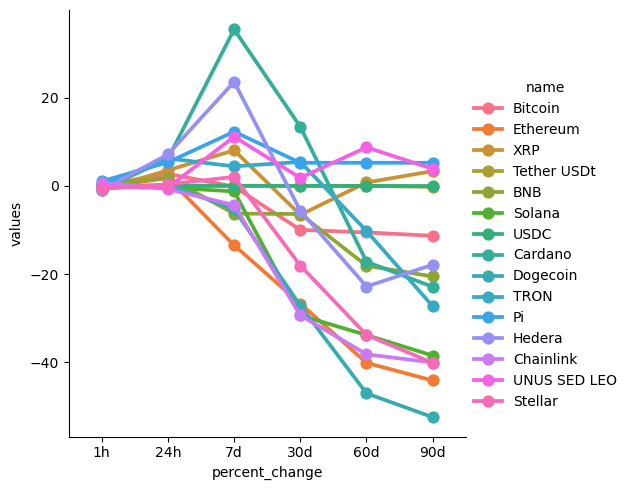

In [53]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [61]:
df10 = df72[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,98927.898711,2025-02-21 08:02:04.186372
15,Bitcoin,99024.053549,2025-02-21 08:03:04.360453
30,Bitcoin,87902.471294,2025-03-04 15:44:18.364349
45,Bitcoin,87968.865829,2025-03-04 15:45:18.529037
60,Bitcoin,87953.559708,2025-03-04 15:46:18.714116
75,Bitcoin,87953.559708,2025-03-04 15:47:18.936302
90,Bitcoin,87995.163270,2025-03-04 15:48:19.166053
105,Bitcoin,87914.347341,2025-03-04 15:49:19.398252
120,Bitcoin,87894.709549,2025-03-04 15:50:19.585864
135,Bitcoin,87988.433574,2025-03-04 15:51:19.812521


C:\Users\makar\AppData\Local\Temp\ipykernel_11052\73700721.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90);


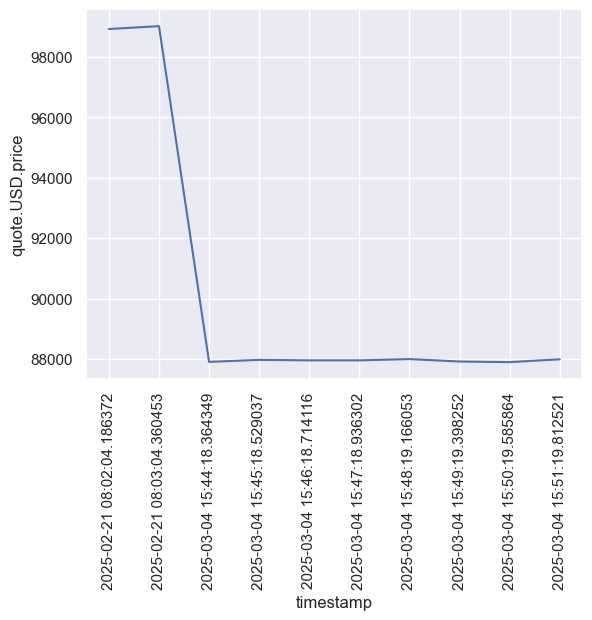

In [75]:
sns.set_theme(style="darkgrid")
axes = sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90);